<a href="https://colab.research.google.com/github/AmiraBelkis/Classif_urban/blob/main/Script.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Training

Uploading my own dataset

In [1]:

#importing from github
!git clone https://github.com/AmiraBelkis/Classif_urban.git
import sys
sys.path.append('/content/Classif_urban')


Cloning into 'Classif_urban'...
remote: Enumerating objects: 135, done.
remote: Counting objects: 100% (111/111), done.
remote: Compressing objects: 100% (96/96), done.
remote: Total 135 (delta 19), reused 55 (delta 13), pack-reused 24
Receiving objects: 100% (135/135), 7.86 MiB | 35.95 MiB/s, done.
Resolving deltas: 100% (19/19), done.


In [1]:
import cv2
import matplotlib.pyplot as plt
import os
from PIL import Image
import numpy as np
import pandas as pd

os.chdir('/content/Classif_urban/train/images')
os.chdir('/content/Classif_urban/train/masks')
imgs   = os.listdir('/content/Classif_urban/train/images')
masks = os.listdir('/content/Classif_urban/train/masks')

imgs.sort()
masks.sort()
print(imgs)
print(masks)

['image_part_001.jpg', 'image_part_002.jpg', 'image_part_003.jpg', 'image_part_004.jpg', 'image_part_005.jpg', 'image_part_006.jpg', 'image_part_007.jpg', 'image_part_008.jpg', 'image_part_009.jpg', 'image_part_010.jpg', 'image_part_011.jpg', 'image_part_012.jpg', 'image_part_013.jpg', 'image_part_014.jpg', 'image_part_015.jpg', 'image_part_016.jpg', 'image_part_017.jpg', 'image_part_018.jpg', 'image_part_019.jpg', 'image_part_020.jpg', 'image_part_021.jpg', 'image_part_022.jpg', 'image_part_023.jpg', 'image_part_024.jpg', 'image_part_025.jpg', 'image_part_026.jpg', 'image_part_027.jpg']
['image_part_001.png', 'image_part_002.png', 'image_part_003.png', 'image_part_004.png', 'image_part_005.png', 'image_part_006.png', 'image_part_007.png', 'image_part_008.png', 'image_part_009.png', 'image_part_010.png', 'image_part_011.png', 'image_part_012.png', 'image_part_013.png', 'image_part_014.png', 'image_part_015.png', 'image_part_016.png', 'image_part_017.png', 'image_part_018.png', 'image_p

In [2]:
s = 27
y = np.zeros((s, 28,28,1), dtype=np.float32)
X = np.zeros((s,224, 224, 1), dtype=np.float32)
n = 0
for file in imgs:
  #index = img.index(file)
  dir_img = os.path.join('/content/Classif_urban/train/images', file)
  img = Image.open(dir_img)
  img = img.resize((224, 224))
  img = np.reshape(img.convert('L'), (224,224,1)) 
  X[n] = img
  n = n+1
n = 0
"""
for mask in masks:
  #mask = masks[index]
  dir_mask = os.path.join('/content/Classif_urban/train/masks', mask)
  mask_img = cv2.imread(dir_mask)
  #mask_img = (mask_img!=2)*1.0  
  mask_img_ = cv2.resize(mask_img, (28, 28))
  #mask_img = 1.0*(mask_img_[:,:,0]>0.2)
  #mask_img = mask_img_[:,:,0]
  y[n] = mask_img_
  n = n+1"""
for file in masks:
  #index = img.index(file)
  dir_img = os.path.join('/content/Classif_urban/train/masks', file)
  img = Image.open(dir_img)
  img = img.resize((28, 28))
  img = np.reshape(img.convert('L'), (28,28,1)) 
  y[n] = img
  n = n+1

In [ ]:
print(y[1])
print(type(y[1]))
print(y[1].shape)

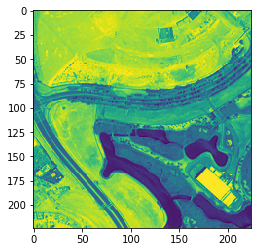

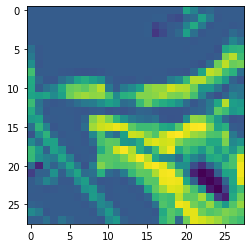

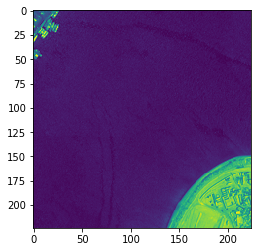

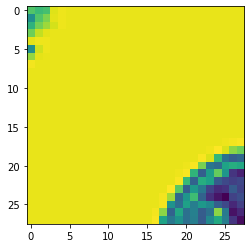

In [3]:
# displaying our training set
from matplotlib import pyplot as plt
for i in range(20,22):
  im = X[i,:,:,0]
  mask = y[i,:,:,0]
  plt.imshow(im, interpolation='nearest')
  plt.show()
  plt.imshow(mask, interpolation='nearest')
  plt.show()
  

In [ ]:
"""
# always restart runtime aftre downloading a new version of package
# use this env to run segmentation models because latest version not compatible 
!pip3 install tensorflow==2.2
!pip3 install keras==2.3.1
#!pip3 install -U segmentation-models # v=1.0.1
# Some models of version above (1.*) are not compatible with previously trained models, if you have such models and want to load them - roll back with
!pip install -U segmentation-models==0.2.1
"""
import keras 
import tensorflow.keras
print("keras ",keras.__version__)
print("tensorflow.keras ",tensorflow.keras.__version__)
print("tensorflow",tensorflow.__version__)
#!pip install segmentation_models
import segmentation_models as sm
print("segmentation_models ",sm.__version__)
from segmentation_models import Unet
from segmentation_models.backbones import get_preprocessing
from segmentation_models.losses import bce_jaccard_loss
from segmentation_models.metrics import iou_score

In [ ]:
"""
#!pip install git+https://github.com/qubvel/segmentation_models
!pip install segmentation_models
!git clone https://github.com/qubvel/segmentation_models.git
!pip install keras-segmentation
!pip install tensorflow==1.14
!pip install keras==2.2.4
!pip install segmentation-models==0.1.2
!pip install segmentation_models
"""

from sklearn.model_selection import train_test_split
import tensorflow as tf
from keras.optimizers import Adam
from tensorflow.keras.losses import binary_crossentropy
from keras.models import model_from_json

from keras.layers import Input, Conv2D, Reshape
from keras.models import Model


from segmentation_models import Unet
from segmentation_models.backbones import get_preprocessing
from segmentation_models.losses import bce_jaccard_loss
from segmentation_models.metrics import iou_score

In [4]:
from segmentation_models import Unet
from segmentation_models.backbones import get_preprocessing
from segmentation_models.losses import bce_jaccard_loss
from segmentation_models.metrics import iou_score
from sklearn.model_selection import train_test_split
import tensorflow as tf
from keras.optimizers import Adam
from tensorflow.keras.losses import binary_crossentropy
from keras.models import model_from_json

from keras.layers import Input, Conv2D, Reshape
from keras.models import Model

Using TensorFlow backend.
/usr/local/lib/python3.7/dist-packages/classification_models/resnext/__init__.py:4: UserWarning: Current ResNext models are deprecated, use keras.applications ResNeXt models
  warnings.warn('Current ResNext models are deprecated, '


In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
BACKBONE = 'resnet34'
preprocess_input = get_preprocessing(BACKBONE)
X_train = preprocess_input(X_train)
X_test = preprocess_input(X_test)

In [6]:
from keras.layers import Reshape
N = X_train.shape[-1]

base_model = Unet(backbone_name='resnet34', encoder_weights='imagenet')

input_base_model = Input(shape=(224, 224, N))

l1 = Conv2D(3, (1, 1))(input_base_model)

out = base_model(l1)
print(type(out))
x1 = Conv2D(10, kernel_size =3,strides=2,padding = "same", activation="relu")(out)
#x1 = tf.keras.layers.BatchNormalization()
#print(type(x1))
print(x1) # shape = shape=(None, 112, 112, 10)
x2= Conv2D(10, kernel_size=3,strides=2,padding = "same", activation="relu")(x1)
#x2 = tf.keras.layers.BatchNormalization()
print(x2.shape)
x3 = Conv2D(10, kernel_size=3,strides=2,padding = "same", activation="relu")(x2)
#x3 = tf.keras.layers.BatchNormalization()
print(x3.shape)
"""
x4 = Conv2D(1, kernel_size=2,strides=2,padding = "same", activation="relu")(x3)
print(type(x4))
print(x4.shape)"""
x_out = Reshape((28,28,10))(x3)

model = Model(input_base_model, x_out, name=base_model.name)

85524480/85521592 [==============================] - 10s 0us/step
<class 'tensorflow.python.framework.ops.Tensor'>
Tensor("conv2d_2/Relu:0", shape=(None, 112, 112, 10), dtype=float32)
(None, 56, 56, 10)
(None, 28, 28, 10)


In [7]:
def dice_coefficient(y_true, y_pred):
    numerator = 2 * tf.reduce_sum(y_true * y_pred)
    denominator = tf.reduce_sum(y_true + y_pred)
    return numerator / (denominator + tf.keras.backend.epsilon())

def loss(y_true, y_pred):
    return binary_crossentropy(y_true, y_pred) - tf.math.log(dice_coefficient(y_true, y_pred) + tf.keras.backend.epsilon())

model.compile(optimizer='sgd', loss=loss, metrics=[dice_coefficient])

model.fit(X_train,y_train,batch_size=32,epochs=30,validation_data=(X_test, y_test))
model.evaluate(X_test, y_test)

Train on 21 samples, validate on 6 samples
Epoch 1/30
21/21 [==============================] - 46s 2s/step - loss: 1458.1727 - dice_coefficient: 0.0305 - val_loss: nan - val_dice_coefficient: nan
Epoch 2/30
21/21 [==============================] - 26s 1s/step - loss: -1079.9714 - dice_coefficient: 190.6946 - val_loss: -1063.3434 - val_dice_coefficient: 151.3757
Epoch 3/30
21/21 [==============================] - 25s 1s/step - loss: -1079.9985 - dice_coefficient: 195.6770 - val_loss: -1063.3435 - val_dice_coefficient: 151.3901
Epoch 4/30
21/21 [==============================] - 25s 1s/step - loss: -1080.0011 - dice_coefficient: 196.2581 - val_loss: -1063.3435 - val_dice_coefficient: 151.4051
Epoch 5/30
21/21 [==============================] - 27s 1s/step - loss: -1080.0020 - dice_coefficient: 196.7385 - val_loss: -1063.3438 - val_dice_coefficient: 151.4192
Epoch 6/30
21/21 [==============================] - 25s 1s/step - loss: -1080.0043 - dice_coefficient: 197.1364 - val_loss: -1063.34

[-1063.345458984375, 151.76779174804688]

In [8]:
from keras.models import model_from_json
model_json = model.to_json()

with open("/content/model.json", "w") as json_file:
    json_file.write(model_json)
model.save_weights("/content/model.h5")
print("Saved model to disk")

Saved model to disk


In [9]:
training_pred = model.predict(X_train)
testing_pred = model.predict(X_test)

def prediction(X, y, pred, k=None):
    if (k  == None):
        k = np.random.randint(0, len(X))

    has_mask = y[k].max() > 0

    figure, j = plt.subplots(1, 3, figsize=(20, 20))
    j[0].imshow(X[k, ..., 0])
    if has_mask:
        j[0].contour(y[i].squeeze())
    k[1].imshow(y[i].squeeze())
    k[2].imshow(pred[i].squeeze())
    if has_mask:
        k[2].contour(pred[i].squeeze())

In [10]:
print(type(training_pred))
print(training_pred.shape)

print(type(testing_pred))
print(testing_pred.shape)

<class 'numpy.ndarray'>
(21, 28, 28, 10)
<class 'numpy.ndarray'>
(6, 28, 28, 10)


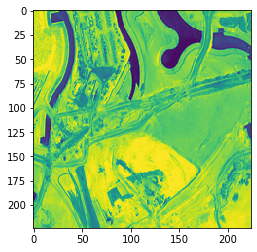

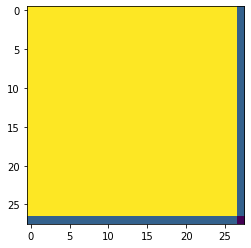

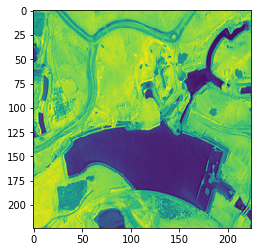

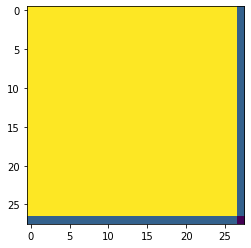

In [12]:
# displaying our training set
from matplotlib import pyplot as plt
for i in range(0,2):
  im = X[i,:,:,0]
  mask = testing_pred[i,:,:,0]
  plt.imshow(im, interpolation='nearest')
  plt.show()
  plt.imshow(mask, interpolation='nearest')
  plt.show()

# transflow exemple code

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [13]:

from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Conv2D, Input, MaxPooling2D, Dropout, concatenate, UpSampling2D


def Unet(num_class, image_size):

    inputs = Input(shape=[image_size, image_size, 1])
    conv1 = Conv2D(64, 3, activation = 'relu', padding = 'same')(inputs)
    conv1 = Conv2D(64, 3, activation = 'relu', padding = 'same')(conv1)
    pool1 = MaxPooling2D(pool_size=(2, 2))(conv1)
    conv2 = Conv2D(128, 3, activation = 'relu', padding = 'same')(pool1)
    conv2 = Conv2D(128, 3, activation = 'relu', padding = 'same')(conv2)
    pool2 = MaxPooling2D(pool_size=(2, 2))(conv2)
    conv3 = Conv2D(256, 3, activation = 'relu', padding = 'same')(pool2)
    conv3 = Conv2D(256, 3, activation = 'relu', padding = 'same')(conv3)
    pool3 = MaxPooling2D(pool_size=(2, 2))(conv3)
    conv4 = Conv2D(512, 3, activation = 'relu', padding = 'same')(pool3)
    conv4 = Conv2D(512, 3, activation = 'relu', padding = 'same')(conv4)
    drop4 = Dropout(0.5)(conv4)
    pool4 = MaxPooling2D(pool_size=(2, 2))(drop4)

    conv5 = Conv2D(1024, 3, activation = 'relu', padding = 'same')(pool4)
    conv5 = Conv2D(1024, 3, activation = 'relu', padding = 'same')(conv5)
    drop5 = Dropout(0.5)(conv5)

    up6 = Conv2D(512, 2, activation = 'relu', padding = 'same')(UpSampling2D(size = (2,2))(drop5))
    merge6 = concatenate([drop4,up6], axis = 3)
    conv6 = Conv2D(512, 3, activation = 'relu', padding = 'same')(merge6)
    conv6 = Conv2D(512, 3, activation = 'relu', padding = 'same')(conv6)

    up7 = Conv2D(256, 2, activation = 'relu', padding = 'same')(UpSampling2D(size = (2,2))(conv6))
    merge7 = concatenate([conv3,up7], axis = 3)
    conv7 = Conv2D(256, 3, activation = 'relu', padding = 'same')(merge7)
    conv7 = Conv2D(256, 3, activation = 'relu', padding = 'same')(conv7)

    up8 = Conv2D(128, 2, activation = 'relu', padding = 'same')(UpSampling2D(size = (2,2))(conv7))
    merge8 = concatenate([conv2,up8], axis = 3)
    conv8 = Conv2D(128, 3, activation = 'relu', padding = 'same')(merge8)
    conv8 = Conv2D(128, 3, activation = 'relu', padding = 'same')(conv8)

    up9 = Conv2D(64, 2, activation = 'relu', padding = 'same')(UpSampling2D(size = (2,2))(conv8))
    merge9 = concatenate([conv1,up9], axis = 3)
    conv9 = Conv2D(64, 3, activation = 'relu', padding = 'same')(merge9)
    conv9 = Conv2D(64, 3, activation = 'relu', padding = 'same')(conv9)
    conv9 = Conv2D(2, 3, activation = 'relu', padding = 'same')(conv9)
    conv10 = Conv2D(num_class, 1, activation = 'sigmoid')(conv9)
    model = Model(inputs = inputs, outputs = conv10)
    model.compile(optimizer = Adam(lr = 1e-4), loss = 'binary_crossentropy', metrics = ['accuracy'])

    return model
"""
----------------------------------------------
"""
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
model = Unet(1, image_size=224)
trainset = (X_train,y_train)
model.fit_generator(trainset,steps_per_epoch=9,epochs=5)
model.save_weights("model.h5")

testSet =  (X_test,y_test)
alpha   = 0.3
model.load_weights("model.h5")
if not os.path.exists("./results"): os.mkdir("./results")

for idx, (img, mask) in enumerate(testSet):
    oring_img = img[0]
    pred_mask = model.predict(img)[0]
    pred_mask[pred_mask > 0.5] = 1
    pred_mask[pred_mask <= 0.5] = 0
    img = cv2.cvtColor(img[0], cv2.COLOR_GRAY2RGB)
    H, W, C = img.shape
    for i in range(H):
        for j in range(W):
            if pred_mask[i][j][0] <= 0.5:
                img[i][j] = (1-alpha)*img[i][j]*255 + alpha*np.array([0, 0, 255])
            else:
                img[i][j] = img[i][j]*255
    image_accuracy = np.mean(mask == pred_mask)
    image_path = "/content/results/pred_"+str(idx)+".png"
    print("=> accuracy: %.4f, saving %s" %(image_accuracy, image_path))
    cv2.imwrite(image_path, img)
    cv2.imwrite("/content/results/origin_%d.png" %idx, oring_img*255)
    if idx == 29: break

Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/5


ValueError: ignored